In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('seaborn-white')

from datetime import datetime

In [2]:
# Import the Dataset
selected_month = pd.read_csv('2019-Nov.csv')
selected_month.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [3]:
selected_month.shape

(67501979, 9)

In [4]:
selected_month.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

QUESTION 3:

            What is the brand whose prices are higher on average?

In [5]:
# Select part of the dataset
Month = selected_month.iloc[:,1:7]
# drop the excess column
Month = Month.drop(columns=['event_type','product_id','category_id']) 
Month.head()

,category_code,brand,price
0,electronics.smartphone,xiaomi,489.07
1,appliances.sewing_machine,janome,293.65
2,NaN,creed,28.31
3,appliances.kitchen.washer,lg,712.87
4,electronics.smartphone,xiaomi,183.27


In [6]:
# Group the column by category_code and brand and compute the average price
table = Month.groupby(['category_code','brand'], as_index=False)['price'].mean()
# rename the column
table = table.rename(columns={"price": "average_price"})
table

,category_code,brand,average_price
0,accessories.bag,a-elita,47.972656
1,accessories.bag,acer,50.123370
2,accessories.bag,acron,15.238621
3,accessories.bag,amen,43.593651
4,accessories.bag,andromeda,28.610698
...,...,...,...
3872,stationery.cartrige,sakura,13.318667
3873,stationery.cartrige,samsung,33.915085
3874,stationery.cartrige,superfine,11.647600
3875,stationery.cartrige,xerox,66.670000


In [7]:
# Split the "category_code" data in category and sub_category
table['category'], table['sub_category'] = table['category_code'].str.split('.', 1).str
table

,category_code,brand,average_price,category,sub_category
0,accessories.bag,a-elita,47.972656,accessories,bag
1,accessories.bag,acer,50.123370,accessories,bag
2,accessories.bag,acron,15.238621,accessories,bag
3,accessories.bag,amen,43.593651,accessories,bag
4,accessories.bag,andromeda,28.610698,accessories,bag
...,...,...,...,...,...
3872,stationery.cartrige,sakura,13.318667,stationery,cartrige
3873,stationery.cartrige,samsung,33.915085,stationery,cartrige
3874,stationery.cartrige,superfine,11.647600,stationery,cartrige
3875,stationery.cartrige,xerox,66.670000,stationery,cartrige


In [8]:
# Rearrange the Dataframe "table"
cols = table.columns.tolist()
cols = cols[-3:] + cols[:-3]
table = table[cols]
table

,average_price,category,sub_category,category_code,brand
0,47.972656,accessories,bag,accessories.bag,a-elita
1,50.123370,accessories,bag,accessories.bag,acer
2,15.238621,accessories,bag,accessories.bag,acron
3,43.593651,accessories,bag,accessories.bag,amen
4,28.610698,accessories,bag,accessories.bag,andromeda
...,...,...,...,...,...
3872,13.318667,stationery,cartrige,stationery.cartrige,sakura
3873,33.915085,stationery,cartrige,stationery.cartrige,samsung
3874,11.647600,stationery,cartrige,stationery.cartrige,superfine
3875,66.670000,stationery,cartrige,stationery.cartrige,xerox


 - write a function that ask at the user a category in inputs

In [9]:
# Function for plot the category code
def category_code_plot_avg_price(word):
                  
    table2 = table.loc[table['category_code'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the November average price of {word}.')
    plt.show()
    
    return ax

In [10]:
# Function for plot the category
def category_plot_avg_price(word):
                  
    table2 = table.loc[table['category'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the November average price of {word}.')
    plt.show()
    
    return ax

In [11]:
# Function for plot the sub_category
def subcategory_plot_avg_price(word):
                  
    table2 = table.loc[table['sub_category'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the November average price of {word}.')
    plt.show()
    
    return ax

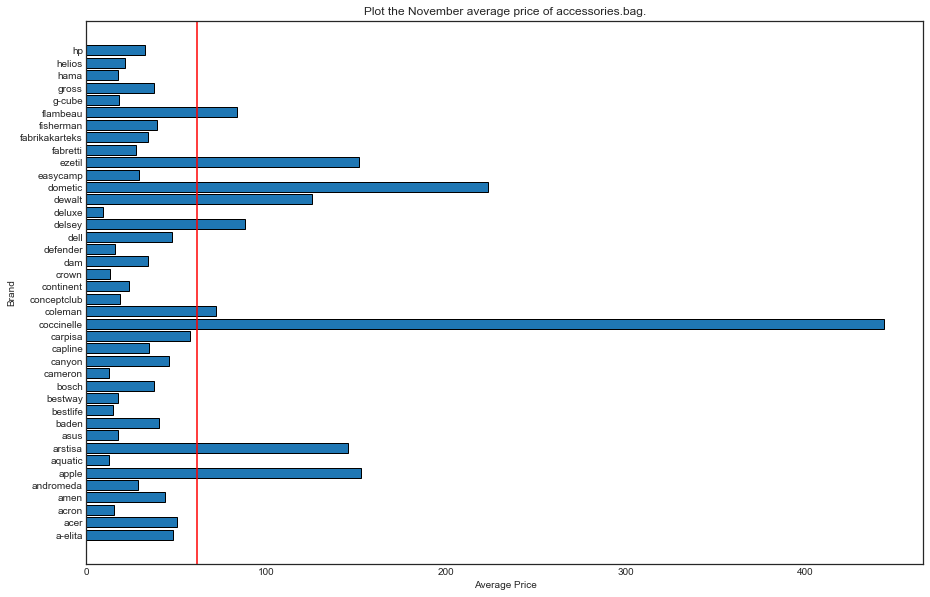

In [12]:
category_code_plot_avg_price('accessories.bag')

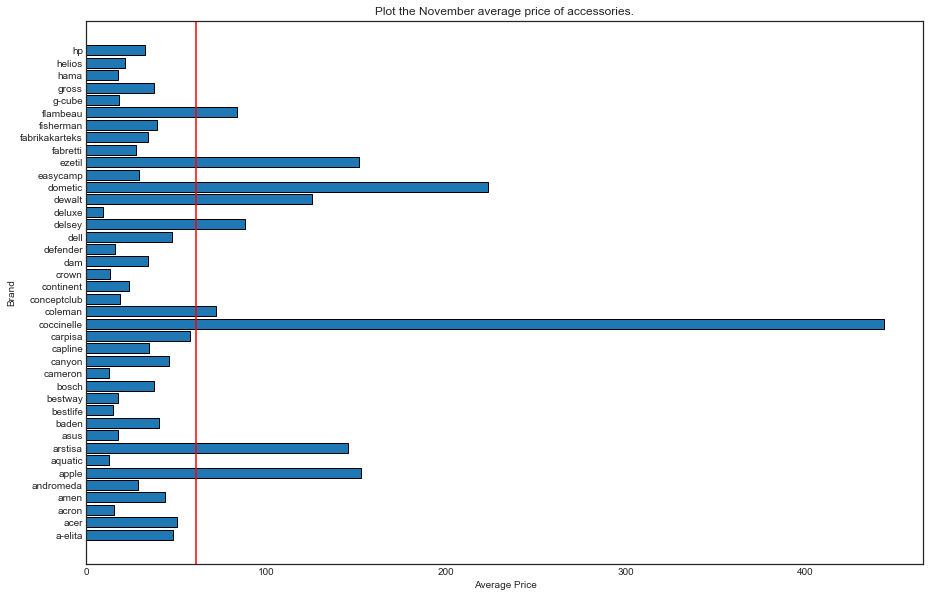

In [13]:
category_plot_avg_price('accessories')

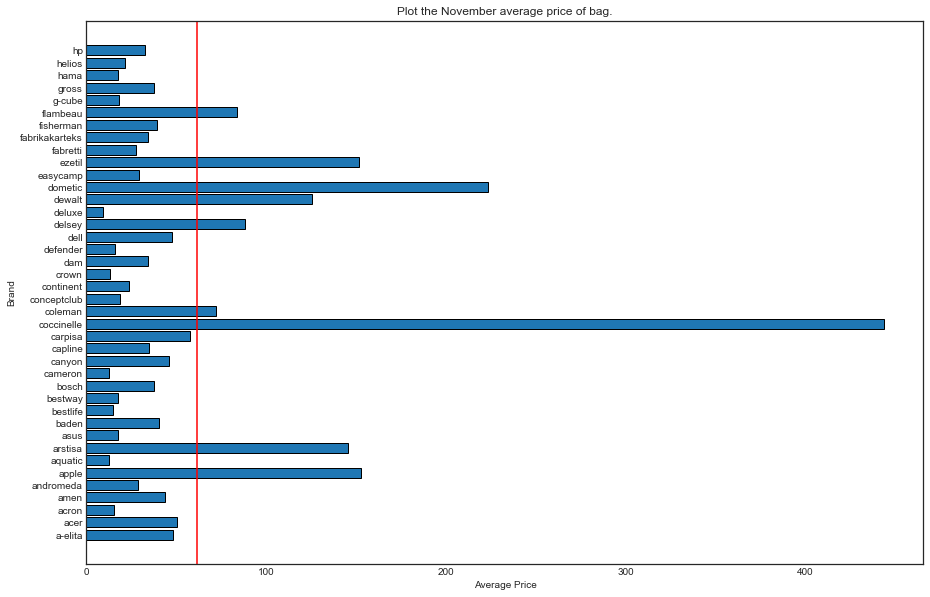

In [14]:
subcategory_plot_avg_price('bag')

 - Find, for each categoty, the brand with the highest average price.

In [15]:
# Find the Category Object with the Maximum Price 
Max_Price = table.groupby(['category'], as_index=False)['average_price'].max()
Max_Price

,category,average_price
0,accessories,773.611582
1,apparel,1332.252174
2,appliances,2234.804821
3,auto,1123.877582
4,computers,2558.752243
5,construction,2199.047736
6,country_yard,896.938462
7,electronics,2562.630000
8,furniture,2006.490000
9,kids,1801.820000


In [16]:
# Merge the two dataset
merge_dataset = Max_Price.merge(table, on='average_price')
# Select only conversion rate and sort in decring order
Merge_dataset = merge_dataset.drop(columns=['category_y'])
# rename the column
Merge_dataset = Merge_dataset.rename(columns={"category_x": "category", "average_price":"Max_price"})
Dataset_ascending = Merge_dataset.sort_values(by='Max_price', ascending=False, inplace=False)
Dataset_ascending

,category,Max_price,sub_category,category_code,brand
11,sport,2573.810000,bicycle,sport.bicycle,pinarello
7,electronics,2562.630000,audio.acoustic,electronics.audio.acoustic,fly
4,computers,2558.752243,notebook,computers.notebook,dreammachines
2,appliances,2234.804821,kitchen.washer,appliances.kitchen.washer,siemens
5,construction,2199.047736,tools.pump,construction.tools.pump,helix
8,furniture,2006.490000,bathroom.bath,furniture.bathroom.bath,jacobdelafon
9,kids,1801.820000,carriage,kids.carriage,hartan
1,apparel,1332.252174,shoes,apparel.shoes,sergiorossi
3,auto,1123.877582,accessories.compressor,auto.accessories.compressor,metabo
6,country_yard,896.938462,lawn_mower,country_yard.lawn_mower,viking


QUESTION 5:

            In what part of the day is your store most visited?

In [3]:
# Select part of the dataset
Month = selected_month.iloc[:,0:5]
Month = Month.drop(columns=['product_id','category_id'])
Month.head()

,event_time,event_type,category_code
0,2019-11-01 00:00:00 UTC,view,electronics.smartphone
1,2019-11-01 00:00:00 UTC,view,appliances.sewing_machine
2,2019-11-01 00:00:01 UTC,view,NaN
3,2019-11-01 00:00:01 UTC,view,appliances.kitchen.washer
4,2019-11-01 00:00:01 UTC,view,electronics.smartphone


In [4]:
Month.shape

(67501979, 3)

In [5]:
# Transform the data event_time in datatime
Month.event_time = pd.to_datetime(Month.event_time)

In [6]:
# Hour Visitor
Hour = Month.resample('H', on='event_time').event_type.count()
print(Hour)

event_time
2019-11-01 00:00:00+00:00    10887
2019-11-01 01:00:00+00:00    14000
2019-11-01 02:00:00+00:00    32498
2019-11-01 03:00:00+00:00    49348
2019-11-01 04:00:00+00:00    61480
                             ...  
2019-11-30 19:00:00+00:00    64202
2019-11-30 20:00:00+00:00    40506
2019-11-30 21:00:00+00:00    23230
2019-11-30 22:00:00+00:00    14195
2019-11-30 23:00:00+00:00     9953
Freq: H, Name: event_type, Length: 720, dtype: int64


In [7]:
# Days Visitor
Day = Month.resample('D', on='event_time').event_type.count()
print(Day)

event_time
2019-11-01 00:00:00+00:00    1445360
2019-11-02 00:00:00+00:00    1555538
2019-11-03 00:00:00+00:00    1567774
2019-11-04 00:00:00+00:00    1793128
2019-11-05 00:00:00+00:00    1717244
2019-11-06 00:00:00+00:00    1694821
2019-11-07 00:00:00+00:00    1796833
2019-11-08 00:00:00+00:00    1896402
2019-11-09 00:00:00+00:00    1877906
2019-11-10 00:00:00+00:00    1940575
2019-11-11 00:00:00+00:00    2009390
2019-11-12 00:00:00+00:00    1987569
2019-11-13 00:00:00+00:00    2019165
2019-11-14 00:00:00+00:00    3069726
2019-11-15 00:00:00+00:00    6220416
2019-11-16 00:00:00+00:00    6502957
2019-11-17 00:00:00+00:00    6395377
2019-11-18 00:00:00+00:00    2021512
2019-11-19 00:00:00+00:00    1728541
2019-11-20 00:00:00+00:00    1700086
2019-11-21 00:00:00+00:00    1677336
2019-11-22 00:00:00+00:00    1568243
2019-11-23 00:00:00+00:00    1561716
2019-11-24 00:00:00+00:00    1591765
2019-11-25 00:00:00+00:00    1593582
2019-11-26 00:00:00+00:00    1654879
2019-11-27 00:00:00+00:00  

In [8]:
# Weak Visitor (starting on monday)
Week_Mon = Month.resample('W-MON', on='event_time').event_type.count()
print(Week_Mon)

event_time
2019-11-04 00:00:00+00:00     6361800
2019-11-11 00:00:00+00:00    12933171
2019-11-18 00:00:00+00:00    28216722
2019-11-25 00:00:00+00:00    11421269
2019-12-02 00:00:00+00:00     8569017
Freq: W-MON, Name: event_type, dtype: int64


In [9]:
# group the vistior's view with a range of 3H
Hour_6 = Month.resample('6H', on='event_time').event_type.count()
Hour_6 = pd.DataFrame(Hour_6)
Hour_6

,event_type
event_time,
2019-11-01 00:00:00+00:00,241663
2019-11-01 06:00:00+00:00,459285
2019-11-01 12:00:00+00:00,547059
2019-11-01 18:00:00+00:00,197353
2019-11-02 00:00:00+00:00,270586
...,...
2019-11-29 18:00:00+00:00,231300
2019-11-30 00:00:00+00:00,286329
2019-11-30 06:00:00+00:00,574830


In [10]:
# show in decresing order the view 3H (head)
Hour_6.sort_values(by='event_type', ascending=False, inplace=False).head(15)

,event_type
event_time,
2019-11-17 12:00:00+00:00,2779318
2019-11-16 06:00:00+00:00,2255272
2019-11-17 06:00:00+00:00,2216935
2019-11-16 12:00:00+00:00,2068622
2019-11-15 06:00:00+00:00,1920827
2019-11-15 12:00:00+00:00,1903648
2019-11-15 00:00:00+00:00,1398559
2019-11-16 00:00:00+00:00,1278779
2019-11-17 00:00:00+00:00,1161548


In [11]:
# show in decresing order the view 3H (tail)
Hour_6.sort_values(by='event_type', ascending=False, inplace=False).tail(15)

,event_type
event_time,
2019-11-02 18:00:00+00:00,224489
2019-11-04 18:00:00+00:00,214784
2019-11-06 18:00:00+00:00,214571
2019-11-23 18:00:00+00:00,211021
2019-11-07 18:00:00+00:00,210131
2019-11-24 18:00:00+00:00,202265
2019-11-21 18:00:00+00:00,200663
2019-11-19 18:00:00+00:00,199929
2019-11-20 18:00:00+00:00,198275


In [12]:
# Create the daily view with the average hour view
Hour_df = pd.DataFrame(Hour)
Hour_df.reset_index(inplace=True)
Hours = Hour_df.resample('D', on='event_time').event_type.mean()
# Create a dataframe 
Hours_df = pd.DataFrame(Hours)
Hours_df.reset_index(inplace=True)
# Add the column value
Hours_df= Hours_df.rename(columns={'event_type': 'avg_hour_count'})
# add a columns with only the numbers of days
Hours_df['days'] = [1,2,3,4,5,6,7,8,9,10,
               11,12,13,14,15,16,17,18,19,
               20,21,22,23,24,25,26,27,28,29,30]
Hours_df

,event_time,avg_hour_count,days
0,2019-11-01 00:00:00+00:00,60223.333333,1
1,2019-11-02 00:00:00+00:00,64814.083333,2
2,2019-11-03 00:00:00+00:00,65323.916667,3
3,2019-11-04 00:00:00+00:00,74713.666667,4
4,2019-11-05 00:00:00+00:00,71551.833333,5
5,2019-11-06 00:00:00+00:00,70617.541667,6
6,2019-11-07 00:00:00+00:00,74868.041667,7
7,2019-11-08 00:00:00+00:00,79016.750000,8
8,2019-11-09 00:00:00+00:00,78246.083333,9
9,2019-11-10 00:00:00+00:00,80857.291667,10


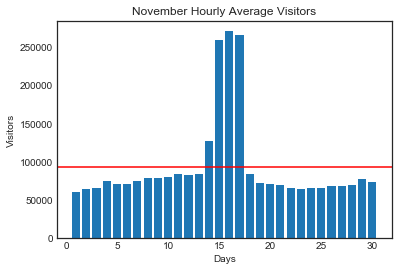

In [13]:
plt.figure()
plt.bar(Hours_df['days'],Hours_df['avg_hour_count'])
plt.axhline(Hours_df['avg_hour_count'].mean(), c='red')
plt.title('November Hourly Average Visitors')
plt.xlabel('Days')
plt.ylabel('Visitors')
plt.show()

QUESTION 6:

            What is the conversion rate of your store?

 - Find the overall conversion rate

In [31]:
# Select part of the dataset
Month = selected_month.iloc[:,1:6]
Month = Month.drop(columns=['brand'])
Month

,event_type,product_id,category_id,category_code
0,view,1003461,2053013555631882655,electronics.smartphone
1,view,5000088,2053013566100866035,appliances.sewing_machine
2,view,17302664,2053013553853497655,NaN
3,view,3601530,2053013563810775923,appliances.kitchen.washer
4,view,1004775,2053013555631882655,electronics.smartphone
...,...,...,...,...
67501974,view,15700137,2053013559733912211,NaN
67501975,view,28719425,2053013565639492569,apparel.shoes
67501976,view,1004833,2053013555631882655,electronics.smartphone
67501977,view,2701706,2053013563911439225,appliances.kitchen.refrigerators


In [15]:
# Count the number of the event type in the dataset
count = Month['event_type'].value_counts() 
# Transform the result in array
count = np.array(count)
# Find the Overall Conversion Rate
Overall_cr = count[2] / count[0] * 100
Overall_cr

1.442723602813325

 - Plot the number of purchase per each category and show the conversion rate

In [59]:
#Groupby by the event type and the category code
table = Month.groupby(['category_code','event_type'], as_index=False).count()
# Fix the dataframe
table = table.rename(columns={"product_id": "count"})
table = table.iloc[:,0:3]
table

,category_code,event_type,count
0,accessories.bag,cart,6319
1,accessories.bag,purchase,1762
2,accessories.bag,view,306574
3,accessories.umbrella,cart,73
4,accessories.umbrella,purchase,26
...,...,...,...
377,sport.trainer,purchase,693
378,sport.trainer,view,93430
379,stationery.cartrige,cart,644
380,stationery.cartrige,purchase,191


In [60]:
# Selection only purchase value
purchase = table[table['event_type'] == 'purchase']
# Number of purchase in decresing order
purchase_sort = purchase.sort_values(by='count', ascending=False, inplace=False)
purchase_sort

,category_code,event_type,count
296,electronics.smartphone,purchase,382647
275,electronics.audio.headphone,purchase,40834
308,electronics.video.tv,purchase,30274
293,electronics.clocks,purchase,23237
148,appliances.kitchen.washer,purchase,19772
...,...,...,...
256,construction.tools.soldering,purchase,6
266,country_yard.furniture.hammok,purchase,4
58,apparel.shorts,purchase,2
109,appliances.kitchen.fryer,purchase,1


In [61]:
# Selection only view value
view = table[table['event_type'] == 'view']
# Merge Purchase and View Dataset
Merge = purchase.merge(view, on='category_code')
Merge = Merge.rename(columns={"category_x": "count"})
Merge

,category_code,event_type_x,count_x,event_type_y,count_y
0,accessories.bag,purchase,1762,view,306574
1,accessories.umbrella,purchase,26,view,4890
2,accessories.wallet,purchase,366,view,68909
3,apparel.belt,purchase,41,view,4527
4,apparel.costume,purchase,879,view,241589
...,...,...,...,...,...
121,sport.ski,purchase,74,view,16382
122,sport.snowboard,purchase,138,view,17375
123,sport.tennis,purchase,48,view,7539
124,sport.trainer,purchase,693,view,93430


In [62]:
# Split the "category_code" data in category and sub_category
Merge['category'], Merge['sub_category'] = Merge['category_code'].str.split('.', 1).str
Merge = Merge.drop(columns=['sub_category', 'category_code']) 
Merge

,event_type_x,count_x,event_type_y,count_y,category
0,purchase,1762,view,306574,accessories
1,purchase,26,view,4890,accessories
2,purchase,366,view,68909,accessories
3,purchase,41,view,4527,apparel
4,purchase,879,view,241589,apparel
...,...,...,...,...,...
121,purchase,74,view,16382,sport
122,purchase,138,view,17375,sport
123,purchase,48,view,7539,sport
124,purchase,693,view,93430,sport


In [63]:
Merge = Merge.groupby(['category','event_type_x','event_type_y'], as_index=False).sum()
Merge

,category,event_type_x,event_type_y,count_x,count_y
0,accessories,purchase,view,2154,380373
1,apparel,purchase,view,14215,2941217
2,appliances,purchase,view,99026,8037980
3,auto,purchase,view,10719,1164278
4,computers,purchase,view,34477,4029049
5,construction,purchase,view,8699,1047072
6,country_yard,purchase,view,60,17297
7,electronics,purchase,view,493639,21988192
8,furniture,purchase,view,11542,2058798
9,kids,purchase,view,6166,779517


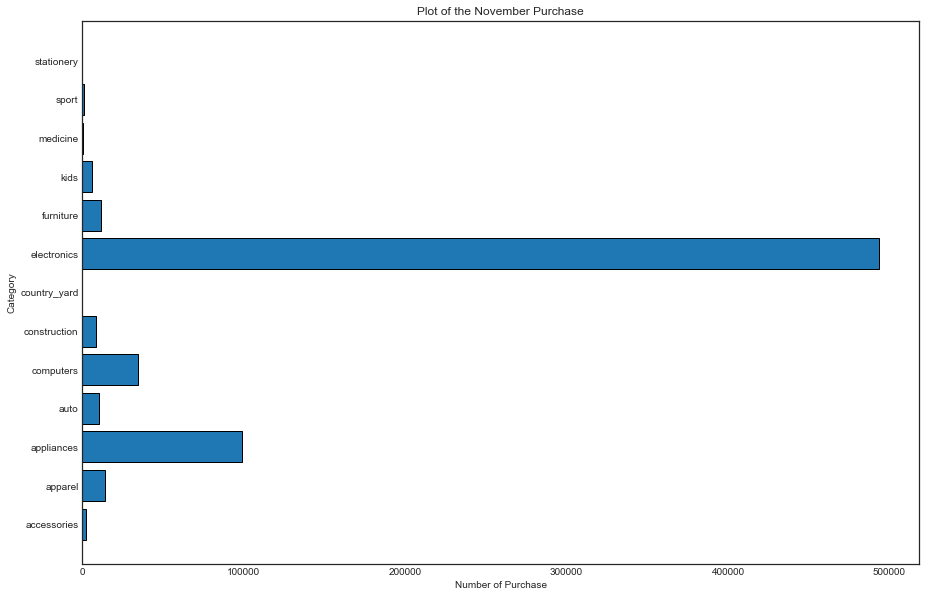

In [64]:
# Make a horizontal bar chart 
plt.figure(figsize = (15, 10))
ax = plt.subplot()
ax.barh(Merge['category'],
        Merge['count_x'], 
            align = 'center', edgecolor = 'k')
plt.xlabel('Number of Purchase')
plt.ylabel('Category')
plt.title('Plot of the November Purchase')
plt.show()

In [65]:
# Add the column 'conversion_rate'
Merge['conversion_rate'] = (Merge['count_x'] / Merge['count_y'])*100
Merge

,category,event_type_x,event_type_y,count_x,count_y,conversion_rate
0,accessories,purchase,view,2154,380373,0.566286
1,apparel,purchase,view,14215,2941217,0.483303
2,appliances,purchase,view,99026,8037980,1.231976
3,auto,purchase,view,10719,1164278,0.920656
4,computers,purchase,view,34477,4029049,0.855711
5,construction,purchase,view,8699,1047072,0.830793
6,country_yard,purchase,view,60,17297,0.346881
7,electronics,purchase,view,493639,21988192,2.245019
8,furniture,purchase,view,11542,2058798,0.560618
9,kids,purchase,view,6166,779517,0.791003


In [66]:
# Select only conversion rate and sort in decring order
Merge = Merge.drop(columns=['event_type_x','count_x','event_type_y','count_y'])
Merge_dec = Merge.sort_values(by='conversion_rate', ascending=False, inplace=False)
Merge_dec

,category,conversion_rate
7,electronics,2.245019
10,medicine,1.656714
12,stationery,1.599263
2,appliances,1.231976
3,auto,0.920656
4,computers,0.855711
5,construction,0.830793
9,kids,0.791003
11,sport,0.618451
0,accessories,0.566286


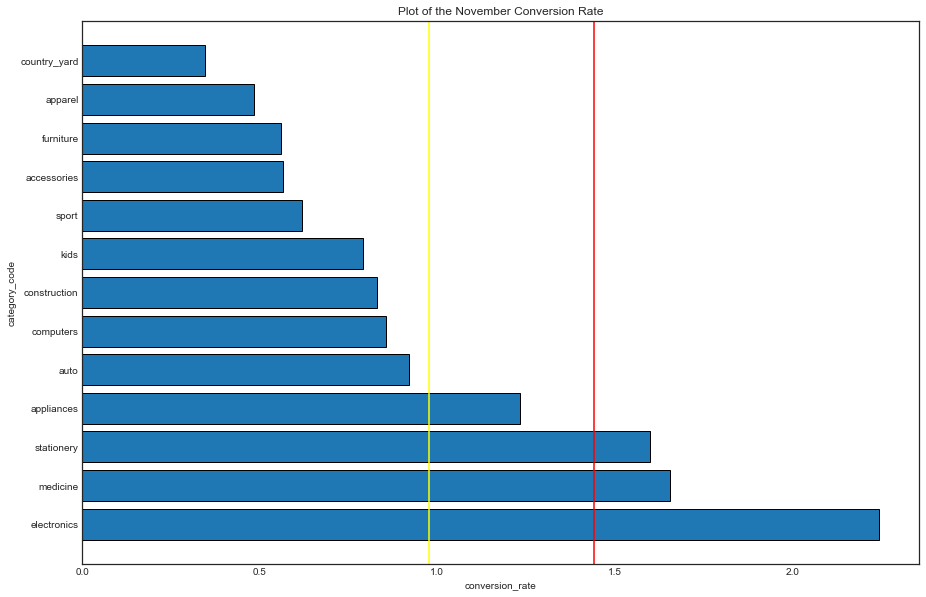

In [67]:
# Make a horizontal bar chart for the conversion rate 
plt.figure(figsize = (15,10))
ax = plt.subplot()
ax.barh(Merge_dec['category'],
        Merge_dec['conversion_rate'], 
            align = 'center', edgecolor = 'k')
plt.axvline(Overall_cr, c='red')
plt.axvline(Merge_dec['conversion_rate'].mean(), c='yellow')
plt.xlabel('conversion_rate')
plt.ylabel('category_code')
plt.title('Plot of the November Conversion Rate')
plt.show()

In [68]:
print(Merge_dec['conversion_rate'])

7     2.245019
10    1.656714
12    1.599263
2     1.231976
3     0.920656
4     0.855711
5     0.830793
9     0.791003
11    0.618451
0     0.566286
8     0.560618
1     0.483303
6     0.346881
Name: conversion_rate, dtype: float64


QUESTION 7: 